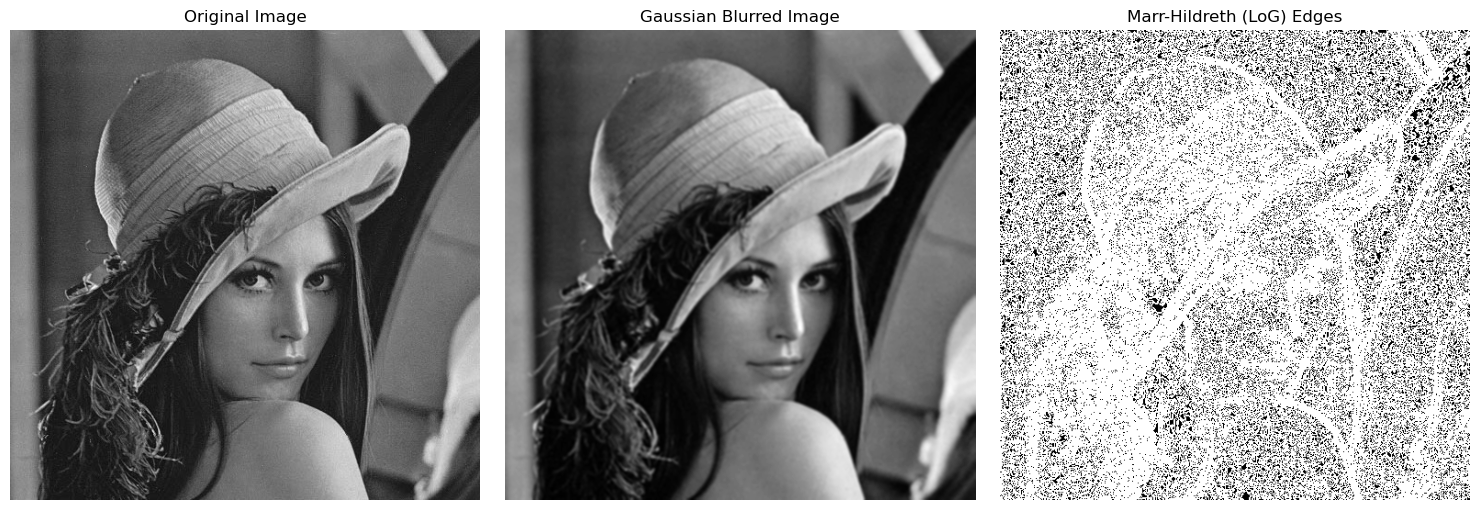

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to the image
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded properly
if image is None:
    print("Error: Image could not be loaded.")
else:
    # Apply Gaussian Blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), sigmaX=1.4)  # Larger kernel and sigma for better noise reduction

    # Apply the Laplacian filter to the blurred image to get the second derivative
    laplacian_filtered = cv2.Laplacian(blurred_image, cv2.CV_64F)

    # Find zero-crossings by thresholding the Laplacian result
    # Threshold the Laplacian to create a binary edge map
    _, zero_crossings = cv2.threshold(np.abs(laplacian_filtered), 0, 255, cv2.THRESH_BINARY)

    # Plot the images in a single row
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title("Gaussian Blurred Image")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(zero_crossings, cmap='gray')
    plt.title("Marr-Hildreth (LoG) Edges")
    plt.axis("off")

    # Show the plot
    plt.tight_layout()
    plt.show()
